# Description

COMPLETE
Generates a plot with TWAS associations using the top genes and traits for LV246 (related to the hypertension cluster).

# Modules loading

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import conf
from data.cache import read_data
from utils import generate_result_set_name
from data.recount2 import LVAnalysis

# Settings

In [3]:
LV_NUMBER_SELECTED = 246
LV_NAME_SELECTED = f"LV{LV_NUMBER_SELECTED}"
display(LV_NAME_SELECTED)

'LV246'

In [4]:
OUTPUT_FIGURES_DIR = Path(
    conf.MANUSCRIPT["FIGURES_DIR"], "lvs_analysis", f"lv{LV_NUMBER_SELECTED}"
).resolve()
display(OUTPUT_FIGURES_DIR)
OUTPUT_FIGURES_DIR.mkdir(parents=True, exist_ok=True)

PosixPath('/home/miltondp/projects/labs/greenelab/phenoplier_manuscript/content/images/lvs_analysis/lv246')

# Data loading

## MultiPLIER summary

In [5]:
multiplier_model_summary = read_data(conf.MULTIPLIER["MODEL_SUMMARY_FILE"])

In [6]:
multiplier_model_summary.shape

(2157, 5)

In [7]:
multiplier_model_summary.head()

,pathway,LV index,AUC,p-value,FDR
1,KEGG_LYSINE_DEGRADATION,1,0.388059,0.866078,0.956005
2,REACTOME_MRNA_SPLICING,1,0.733057,0.000048,0.000582
3,MIPS_NOP56P_ASSOCIATED_PRE_RRNA_COMPLEX,1,0.680555,0.001628,0.011366
4,KEGG_DNA_REPLICATION,1,0.549473,0.312155,0.539951
5,PID_MYC_ACTIVPATHWAY,1,0.639303,0.021702,0.083739


## PhenomeXcan results

### S-MultiXcan

In [8]:
smultixcan_results_filename = conf.PHENOMEXCAN[
    "SMULTIXCAN_EFO_PARTIAL_MASHR_PVALUES_FILE"
]
display(smultixcan_results_filename)

PosixPath('/home/miltondp/projects/labs/greenelab/phenoplier/bases_data/base_orig/data/phenomexcan/gene_assoc/smultixcan-efo_partial-mashr-pvalues.pkl')

In [9]:
smultixcan_results = pd.read_pickle(smultixcan_results_filename)

In [10]:
smultixcan_results.shape

(22515, 3752)

In [11]:
smultixcan_results.head()

,100001_raw-Food_weight,100002_raw-Energy,100003_raw-Protein,100004_raw-Fat,100005_raw-Carbohydrate,100006_raw-Saturated_fat,100007_raw-Polyunsaturated_fat,100008_raw-Total_sugars,100009_raw-Englyst_dietary_fibre,100010-Portion_size,...,visual impairment,vitiligo,vitreous body disease,vocal cord polyp,voice disorders,wellbeing measurement AND family relationship,wheezing,whooping cough,worry measurement,wrist fracture
gene_name,,,,,,,,,,,,,,,,,,,,,
ENSG00000000419,0.252026,0.468724,0.927591,0.765578,0.256649,0.170332,0.947602,0.427011,0.548278,0.750749,...,0.718460,0.176496,0.246989,0.403555,0.240767,0.181131,0.081190,0.309046,0.130487,0.274762
ENSG00000000457,0.536532,0.303888,0.026526,0.445712,0.350088,0.846965,0.280040,0.443678,0.706993,0.497308,...,0.032802,0.898283,0.592864,0.904074,0.604832,0.010916,0.500737,0.045167,0.730846,0.107098
ENSG00000000460,0.606047,0.686510,0.210803,0.664948,0.679265,0.805480,0.216403,0.407993,0.567332,0.434112,...,0.076910,0.320999,0.583544,0.680090,0.133766,0.171694,0.657535,0.676218,0.821253,0.165486
ENSG00000000938,0.778878,0.799565,0.379321,0.724310,0.958652,0.853847,0.881896,0.992030,0.716044,0.708022,...,0.511469,0.040752,0.006017,0.913828,0.313331,0.449832,0.370131,0.381548,0.633786,0.091551
ENSG00000000971,0.583604,0.696627,0.469392,0.243110,0.752039,0.745227,0.106542,0.755472,0.738720,0.070724,...,0.794492,0.518148,0.280036,0.497563,0.142823,0.758332,0.905770,0.155662,0.999998,0.332345


### fastENLOC

In [12]:
fastenloc_results_filename = conf.PHENOMEXCAN["FASTENLOC_EFO_PARTIAL_TORUS_RCP_FILE"]
display(fastenloc_results_filename)

PosixPath('/home/miltondp/projects/labs/greenelab/phenoplier/bases_data/base_orig/data/phenomexcan/gene_assoc/fastenloc-efo_partial-torus-rcp.pkl')

In [13]:
fastenloc_results = pd.read_pickle(fastenloc_results_filename)

In [14]:
fastenloc_results.shape

(38062, 3752)

In [15]:
fastenloc_results.head()

,100001_raw-Food_weight,100002_raw-Energy,100003_raw-Protein,100004_raw-Fat,100005_raw-Carbohydrate,100006_raw-Saturated_fat,100007_raw-Polyunsaturated_fat,100008_raw-Total_sugars,100009_raw-Englyst_dietary_fibre,100010-Portion_size,...,visual impairment,vitiligo,vitreous body disease,vocal cord polyp,voice disorders,wellbeing measurement AND family relationship,wheezing,whooping cough,worry measurement,wrist fracture
gene_id,,,,,,,,,,,,,,,,,,,,,
ENSG00000000419,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000117,...,NaN,NaN,NaN,NaN,NaN,0.000356,0.000670,NaN,0.000862,NaN
ENSG00000000457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000163,...,0.002152,NaN,NaN,NaN,NaN,0.003799,0.002538,NaN,0.001622,0.000241
ENSG00000000460,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000104,NaN,0.000156,...,0.000719,NaN,NaN,NaN,NaN,0.000375,0.002800,NaN,0.002147,0.000489
ENSG00000000938,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000142,0.000301,NaN,NaN,NaN,0.000108,0.001551,NaN,0.001443,NaN
ENSG00000000971,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000124,...,0.000114,NaN,NaN,NaN,NaN,0.000197,0.003033,NaN,0.001230,0.000158


## S-MultiXcan projection (`z_score_std`)

In [16]:
INPUT_SUBSET = "z_score_std"

In [17]:
INPUT_STEM = "projection-smultixcan-efo_partial-mashr-zscores"

In [18]:
input_filepath = Path(
    conf.RESULTS["DATA_TRANSFORMATIONS_DIR"],
    INPUT_SUBSET,
    f"{INPUT_SUBSET}-{INPUT_STEM}.pkl",
).resolve()
display(input_filepath)

assert input_filepath.exists(), "Input file does not exist"

input_filepath_stem = input_filepath.stem
display(input_filepath_stem)

PosixPath('/home/miltondp/projects/labs/greenelab/phenoplier/bases_data/base_orig/results/data_transformations/z_score_std/z_score_std-projection-smultixcan-efo_partial-mashr-zscores.pkl')

'z_score_std-projection-smultixcan-efo_partial-mashr-zscores'

In [19]:
data = read_data(input_filepath)

In [20]:
data.shape

(3752, 987)

In [21]:
data.head()

,LV1,LV2,LV3,LV4,LV5,LV6,LV7,LV8,LV9,LV10,...,LV978,LV979,LV980,LV981,LV982,LV983,LV984,LV985,LV986,LV987
100001_raw-Food_weight,-0.695006,1.962565,0.057683,0.878731,-0.539977,1.481272,-0.396422,1.090180,0.759223,0.931395,...,1.129784,1.752343,-1.411403,2.823863,0.931116,-1.054519,0.432982,-0.633597,0.554279,-0.642479
100002_raw-Energy,-1.528127,-0.345309,-0.148953,-0.242060,0.373427,0.791092,0.263477,0.987702,0.354391,1.416059,...,0.224604,0.769882,-0.509482,0.091153,2.286789,-1.008256,-0.029764,1.737229,-0.272107,-0.526125
100003_raw-Protein,-0.704572,-1.011299,0.671420,0.143991,0.615212,0.874212,-0.040998,0.915170,0.254369,-0.084237,...,1.003019,1.044314,-2.376108,0.004778,0.053714,-0.892447,-0.183800,1.377991,-0.278794,-0.419733
100004_raw-Fat,-0.989832,-1.875490,0.261555,-1.420719,0.366238,1.167049,0.257387,0.717674,-0.997664,0.969825,...,0.585913,0.638314,0.119139,-0.140204,1.394326,-1.173402,0.555058,1.013982,-0.544506,-0.064061
100005_raw-Carbohydrate,-0.580143,0.243335,0.158966,-0.036558,0.068176,-0.202639,1.101281,0.675227,1.463432,1.010078,...,-0.249108,-0.026814,0.232713,0.323682,1.168642,-0.282935,0.653105,1.909526,0.199997,-1.656894


# LV analysis

In [22]:
lv_obj = lv_exp = LVAnalysis(LV_NAME_SELECTED, data)

In [23]:
lv_gene_sets = multiplier_model_summary[
    multiplier_model_summary["LV index"].isin((str(LV_NUMBER_SELECTED),))
    & (
        (multiplier_model_summary["FDR"] < 0.05)
        | (multiplier_model_summary["AUC"] >= 0.75)
    )
]
display(lv_gene_sets)

[2021-08-02 11:25:52,231 - numexpr.utils] INFO: NumExpr defaulting to 8 threads.


,pathway,LV index,AUC,p-value,FDR
887,REACTOME_TRIGLYCERIDE_BIOSYNTHESIS,246,0.857366,5.437536e-05,6.515981e-04
888,KEGG_PYRUVATE_METABOLISM,246,0.817668,2.905798e-04,2.655850e-03
889,REACTOME_FATTY_ACID_TRIACYLGLYCEROL_AND_KETONE...,246,0.890091,2.762125e-18,3.971936e-16
890,KEGG_PROPANOATE_METABOLISM,246,0.828621,4.947481e-04,4.268686e-03
891,REACTOME_METABOLISM_OF_LIPIDS_AND_LIPOPROTEINS,246,0.671159,3.216205e-10,1.137271e-08


## Traits

In [24]:
lv_obj.lv_traits.shape

(3752,)

In [25]:
lv_obj.lv_traits.head(20)

30100_raw-Mean_platelet_thrombocyte_volume                                                                              6.632557
MAGNETIC_CH2.DB.ratio                                                                                                   6.584225
1747_2-Hair_colour_natural_before_greying_Red                                                                           6.287111
3143_raw-Ankle_spacing_width                                                                                            5.119107
hypercholesterolemia                                                                                                    4.991051
4119_raw-Ankle_spacing_width_right                                                                                      4.822150
20095_3-Size_of_white_wine_glass_drunk_large_250ml                                                                      4.490390
1727-Ease_of_skin_tanning                                                                        

In [26]:
lv_traits = lv_obj.lv_traits.copy()

## Genes

In [27]:
lv_obj.lv_genes.shape

(6750, 3)

In [28]:
lv_obj.lv_genes.head(10)

,gene_name,LV246,gene_band
0,SCD,6.672060,10q24.31
1,ACSS2,6.258514,20q11.22
2,GPAM,5.714077,10q25.2
3,DGAT2,4.738347,11q13.5
4,ACLY,3.708678,17q21.2
5,GPD1,3.346001,12q13.12
6,MVD,3.320598,16q24.2
7,FASN,2.915241,17q25.3
8,LPL,2.858278,8p21.3
9,ACSL1,2.682199,4q35.1


In [29]:
lv_genes = (
    lv_obj.lv_genes[["gene_name", LV_NAME_SELECTED]].set_index("gene_name").squeeze()
)

In [30]:
lv_genes

gene_name
SCD      6.672060
ACSS2    6.258514
GPAM     5.714077
DGAT2    4.738347
ACLY     3.708678
           ...   
FBXO2    0.000000
FBXO3    0.000000
FBXO5    0.000000
FBXO6    0.000000
GAS6     0.000000
Name: LV246, Length: 6750, dtype: float64

In [31]:
" ".join(lv_genes.index[:20])

'SCD ACSS2 GPAM DGAT2 ACLY GPD1 MVD FASN LPL ACSL1 LSS FADS2 AGPAT2 ACACA ME1 ELOVL5 HSD17B12 SLC7A10 G0S2 SREBF1'

# Prepare data for plot

In [32]:
from entity import Gene, Trait

## Select top genes

In [33]:
lv_top_genes = lv_genes.head(40).rename(index=Gene.GENE_NAME_TO_ID_MAP)

In [34]:
lv_top_genes

gene_name
ENSG00000099194    6.672060
ENSG00000131069    6.258514
ENSG00000119927    5.714077
ENSG00000062282    4.738347
ENSG00000131473    3.708678
ENSG00000167588    3.346001
ENSG00000167508    3.320598
ENSG00000169710    2.915241
ENSG00000175445    2.858278
ENSG00000151726    2.682199
ENSG00000160285    2.535996
ENSG00000134824    2.504681
ENSG00000169692    2.237759
ENSG00000278540    2.138277
ENSG00000065833    2.107366
ENSG00000012660    2.022853
ENSG00000149084    2.007114
ENSG00000130876    1.968451
ENSG00000123689    1.900780
ENSG00000072310    1.783389
ENSG00000135218    1.763034
ENSG00000173599    1.744431
ENSG00000119915    1.676619
ENSG00000134324    1.673466
ENSG00000166347    1.641386
ENSG00000170522    1.617832
ENSG00000174804    1.612687
ENSG00000076555    1.549111
ENSG00000114480    1.539272
ENSG00000112972    1.507852
ENSG00000122729    1.480638
ENSG00000100075    1.478971
ENSG00000111684    1.475193
NSDHL              1.431425
ENSG00000113161    1.398405
ENSG000001

In [35]:
# remove genes not present in S-MultiXcan
lv_top_genes = lv_top_genes.loc[
    [g for g in lv_top_genes.index if g in Gene.GENE_ID_TO_NAME_MAP]
]
# assert lv_top_genes.shape[0] == 30, lv_top_genes.shape

## Select top traits

In [36]:
lv_top_traits = lv_traits.head(20)  # df["trait"]

In [37]:
lv_top_traits.shape

(20,)

In [38]:
lv_top_traits.head()

30100_raw-Mean_platelet_thrombocyte_volume       6.632557
MAGNETIC_CH2.DB.ratio                            6.584225
1747_2-Hair_colour_natural_before_greying_Red    6.287111
3143_raw-Ankle_spacing_width                     5.119107
hypercholesterolemia                             4.991051
Name: LV246, dtype: float64

In [39]:
# Remove some
lv_top_traits = lv_top_traits.drop(
    [
        #         "1737-Childhood_sunburn_occasions",
        "20095_3-Size_of_white_wine_glass_drunk_large_250ml",
        #         "1747_2-Hair_colour_natural_before_greying_Red",
        "TRAUMBRAIN_NONCONCUS-severe_traumatic_brain_injury_does_not_include_concussion",
        #         "3143_raw-Ankle_spacing_width",
        "4119_raw-Ankle_spacing_width_right",
        "4100_raw-Ankle_spacing_width_left",
        "5109_raw-6mm_asymmetry_angle_right",
        "20107_100-Illnesses_of_father_None_of_the_above_group_1",
    ]
)

## Subset S-MultiXcan results

In [40]:
data_subset = smultixcan_results.loc[lv_top_genes.index, lv_top_traits.index].T

In [41]:
data_subset = data_subset.apply(lambda x: -np.log10(x))

In [42]:
data_subset.shape

(14, 39)

In [43]:
data_subset = data_subset.rename(columns=Gene.GENE_ID_TO_NAME_MAP)

In [44]:
data_subset

gene_name,SCD,ACSS2,GPAM,DGAT2,ACLY,GPD1,MVD,FASN,LPL,ACSL1,...,HMGCS1,ACO1,SLC25A1,LPCAT3,HMGCR,PCYT2,LDLR,IDI1,NR1H3,FAR2
30100_raw-Mean_platelet_thrombocyte_volume,92.386919,0.587684,3.503736,0.221131,0.628239,4.023528,2.184272,2.363783,8.859662,12.602078,...,3.553890,5.829331,0.155074,0.891881,7.526666,0.441392,4.593959,0.208380,0.617791,151.087416
MAGNETIC_CH2.DB.ratio,0.113106,0.040464,0.571540,3.250779,0.883728,0.034654,0.657039,0.266857,2.048187,0.018999,...,0.135321,0.011239,0.121435,0.755985,0.125541,0.359139,1.347399,0.199984,0.101140,0.112683
1747_2-Hair_colour_natural_before_greying_Red,0.324428,15.879394,0.641126,0.310305,0.230645,0.030620,135.270773,0.474585,0.016518,0.028220,...,0.768581,0.542300,0.610142,0.219984,0.406138,0.121222,0.276310,0.820085,0.090196,1.371064
3143_raw-Ankle_spacing_width,111.434449,0.923473,1.406411,0.756275,1.056116,0.438232,4.347590,0.236432,0.627722,0.428859,...,1.610386,0.636743,0.741348,1.056908,2.328085,0.595555,3.708927,1.153149,5.124227,0.989422
hypercholesterolemia,4.731402,0.299495,1.278912,1.154471,0.840187,1.807640,0.556574,0.212899,16.122528,0.215560,...,1.117579,0.693656,0.260318,0.094409,41.880671,0.026301,135.004039,0.705129,0.617590,1.421451
1727-Ease_of_skin_tanning,8.157050,29.014895,0.138840,0.071856,0.005422,1.114808,34.196222,0.090457,0.980104,0.895920,...,1.132206,0.109200,0.012806,0.003939,0.331117,0.137473,1.611984,0.347793,0.475694,1.100803
MAGNETIC_HDL.C,0.774292,0.911692,2.889653,1.993451,1.101517,0.276987,0.026077,0.056840,14.916718,0.172439,...,0.030166,0.095056,0.086654,0.158791,0.197761,0.096560,0.034320,0.625644,3.113814,0.260144
30260_raw-Mean_reticulocyte_volume,2.084773,5.623407,1.480349,0.285288,4.521913,0.180576,2.853934,0.972525,16.699091,2.384484,...,1.323955,3.398686,1.468746,8.707582,1.213407,0.195693,4.366543,1.320037,1.694718,0.029383
30070_raw-Red_blood_cell_erythrocyte_distribution_width,4.421457,4.238893,0.065191,1.629703,1.031433,4.599227,0.210939,1.249010,27.968752,0.175381,...,2.146685,0.283378,0.761872,11.761865,3.067496,0.306643,1.166088,0.119690,4.295862,0.098512
102_raw-Pulse_rate_automated_reading,10.659428,2.319864,0.727000,0.681163,1.191017,1.535610,7.394100,3.065481,1.452734,0.331122,...,0.321084,0.172555,0.805129,0.190613,4.174664,0.835551,1.224417,0.144001,1.775088,0.149142


In [45]:
data_subset["trait_description"] = data_subset.apply(
    lambda x: Trait.get_trait(full_code=x.name).description
    if not Trait.is_efo_label(x.name)
    else x.name,
    axis=1,
)

In [46]:
# calculate mean of traits with the same description
data_subset = data_subset.groupby("trait_description").mean()

In [47]:
data_subset.shape

(14, 39)

In [48]:
data_subset.head()

gene_name,SCD,ACSS2,GPAM,DGAT2,ACLY,GPD1,MVD,FASN,LPL,ACSL1,...,HMGCS1,ACO1,SLC25A1,LPCAT3,HMGCR,PCYT2,LDLR,IDI1,NR1H3,FAR2
trait_description,,,,,,,,,,,,,,,,,,,,,
Ankle spacing width,111.434449,0.923473,1.406411,0.756275,1.056116,0.438232,4.347590,0.236432,0.627722,0.428859,...,1.610386,0.636743,0.741348,1.056908,2.328085,0.595555,3.708927,1.153149,5.124227,0.989422
Basophill percentage,8.684300,0.406535,0.078650,0.948685,0.933690,0.617298,0.532383,0.390820,0.237913,2.069719,...,0.071373,0.030413,0.153131,0.253118,0.263664,0.344173,0.399021,10.468635,0.683204,0.541623
CH2DB NMR,0.113106,0.040464,0.571540,3.250779,0.883728,0.034654,0.657039,0.266857,2.048187,0.018999,...,0.135321,0.011239,0.121435,0.755985,0.125541,0.359139,1.347399,0.199984,0.101140,0.112683
Childhood sunburn occasions,1.707303,7.676310,0.401061,1.395297,0.180948,0.651019,6.018767,1.785504,1.540367,0.387373,...,0.323042,0.578506,0.521761,0.727987,0.139181,0.595216,0.292274,0.498541,2.618860,0.520538
Ease of skin tanning,8.157050,29.014895,0.138840,0.071856,0.005422,1.114808,34.196222,0.090457,0.980104,0.895920,...,1.132206,0.109200,0.012806,0.003939,0.331117,0.137473,1.611984,0.347793,0.475694,1.100803


In [49]:
plot_data = data_subset.reset_index().set_index("trait_description")

In [50]:
plot_data

gene_name,SCD,ACSS2,GPAM,DGAT2,ACLY,GPD1,MVD,FASN,LPL,ACSL1,...,HMGCS1,ACO1,SLC25A1,LPCAT3,HMGCR,PCYT2,LDLR,IDI1,NR1H3,FAR2
trait_description,,,,,,,,,,,,,,,,,,,,,
Ankle spacing width,111.434449,0.923473,1.406411,0.756275,1.056116,0.438232,4.347590,0.236432,0.627722,0.428859,...,1.610386,0.636743,0.741348,1.056908,2.328085,0.595555,3.708927,1.153149,5.124227,0.989422
Basophill percentage,8.684300,0.406535,0.078650,0.948685,0.933690,0.617298,0.532383,0.390820,0.237913,2.069719,...,0.071373,0.030413,0.153131,0.253118,0.263664,0.344173,0.399021,10.468635,0.683204,0.541623
CH2DB NMR,0.113106,0.040464,0.571540,3.250779,0.883728,0.034654,0.657039,0.266857,2.048187,0.018999,...,0.135321,0.011239,0.121435,0.755985,0.125541,0.359139,1.347399,0.199984,0.101140,0.112683
Childhood sunburn occasions,1.707303,7.676310,0.401061,1.395297,0.180948,0.651019,6.018767,1.785504,1.540367,0.387373,...,0.323042,0.578506,0.521761,0.727987,0.139181,0.595216,0.292274,0.498541,2.618860,0.520538
Ease of skin tanning,8.157050,29.014895,0.138840,0.071856,0.005422,1.114808,34.196222,0.090457,0.980104,0.895920,...,1.132206,0.109200,0.012806,0.003939,0.331117,0.137473,1.611984,0.347793,0.475694,1.100803
HDL Cholesterol NMR,0.774292,0.911692,2.889653,1.993451,1.101517,0.276987,0.026077,0.056840,14.916718,0.172439,...,0.030166,0.095056,0.086654,0.158791,0.197761,0.096560,0.034320,0.625644,3.113814,0.260144
"Hair colour (natural, before greying): Red",0.324428,15.879394,0.641126,0.310305,0.230645,0.030620,135.270773,0.474585,0.016518,0.028220,...,0.768581,0.542300,0.610142,0.219984,0.406138,0.121222,0.276310,0.820085,0.090196,1.371064
Illnesses of father: Heart disease,4.013556,0.778841,0.388504,0.745409,0.033111,0.012838,0.921401,0.824408,4.767029,0.636369,...,0.314630,0.485358,1.244610,0.086758,0.936889,1.638598,16.607106,0.568762,0.480228,0.102272
Mean platelet (thrombocyte) volume,92.386919,0.587684,3.503736,0.221131,0.628239,4.023528,2.184272,2.363783,8.859662,12.602078,...,3.553890,5.829331,0.155074,0.891881,7.526666,0.441392,4.593959,0.208380,0.617791,151.087416


In [51]:
_old_columns = plot_data.index
display(_old_columns.shape)
display(_old_columns)

(14,)

Index(['Ankle spacing width', 'Basophill percentage', 'CH2DB NMR',
       'Childhood sunburn occasions', 'Ease of skin tanning',
       'HDL Cholesterol NMR', 'Hair colour (natural, before greying): Red',
       'Illnesses of father: Heart disease',
       'Mean platelet (thrombocyte) volume', 'Mean reticulocyte volume',
       'Medication for cholesterol, blood pressure, diabetes, or take exogenous hormones: Cholesterol lowering medication',
       'Pulse rate, automated reading',
       'Red blood cell (erythrocyte) distribution width',
       'hypercholesterolemia'],
      dtype='object', name='trait_description')

In [52]:
# reorder columns
plot_data = plot_data.loc[
    [
        "Ankle spacing width",
        "Basophill percentage",
        "Mean platelet (thrombocyte) volume",
        "Mean reticulocyte volume",
        "Red blood cell (erythrocyte) distribution width",
        "Ease of skin tanning",
        "Childhood sunburn occasions",
        "Hair colour (natural, before greying): Red",
        "Pulse rate, automated reading",
        "CH2DB NMR",
        "HDL Cholesterol NMR",
        "hypercholesterolemia",
        "Medication for cholesterol, blood pressure, diabetes, or take exogenous hormones: Cholesterol lowering medication",
        "Illnesses of father: Heart disease",
    ]
]

In [53]:
assert set(plot_data.index) == set(_old_columns)

## Subset fastENLOC results

In [54]:
data_subset2 = (
    fastenloc_results.loc[lv_top_genes.index, lv_top_traits.index].fillna(0.0).T * 100.0
)

In [55]:
data_subset2.shape

(14, 39)

In [56]:
data_subset2 = data_subset2.rename(columns=Gene.GENE_ID_TO_NAME_MAP)

In [57]:
data_subset2["trait_description"] = data_subset2.apply(
    lambda x: Trait.get_trait(full_code=x.name).description
    if not Trait.is_efo_label(x.name)
    else x.name,
    axis=1,
)

In [58]:
# calculate mean of traits with the same description
data_subset2 = data_subset2.groupby("trait_description").mean()
# _tmp = _tmp.assign(cluster_name=_tmp.apply(lambda x: _cluster_column[x.name], axis=1))

In [59]:
data_subset2.shape

(14, 39)

In [60]:
data_subset2 = data_subset2.loc[plot_data.index, plot_data.columns]

In [61]:
data_subset2.shape

(14, 39)

In [62]:
data_subset2.head()

gene_name,SCD,ACSS2,GPAM,DGAT2,ACLY,GPD1,MVD,FASN,LPL,ACSL1,...,HMGCS1,ACO1,SLC25A1,LPCAT3,HMGCR,PCYT2,LDLR,IDI1,NR1H3,FAR2
trait_description,,,,,,,,,,,,,,,,,,,,,
Ankle spacing width,99.97000,0.00000,0.3635,0.00000,0.01847,0.02705,0.02028,0.00000,0.96115,0.95182,...,0.00000,2.39946,2.3484,1.9120,0.07207,0.00000,0.00000,1.76120,0.02078,0.02839
Basophill percentage,85.46000,0.38902,0.0000,0.98770,1.72377,0.16030,0.22484,0.08366,0.66580,23.97070,...,0.21356,0.79723,1.2075,0.2773,0.20372,0.07613,0.53464,0.24350,0.76065,0.50710
Mean platelet (thrombocyte) volume,99.97000,0.00000,0.0000,0.32154,0.02749,0.00000,0.00000,0.02743,3.33400,40.35000,...,0.04763,3.52700,0.0000,0.0000,0.00000,0.31070,29.47000,0.54683,0.23360,0.00000
Mean reticulocyte volume,0.00000,44.19770,1.4416,0.34186,0.03519,0.05347,0.00000,0.02802,44.75000,0.42050,...,0.93750,21.88320,1.1760,59.1800,2.30820,0.50210,0.00000,0.94441,0.02843,0.44716
Red blood cell (erythrocyte) distribution width,99.53163,0.03567,0.9671,2.17710,4.80900,0.00000,4.07800,0.01611,9.22400,0.48372,...,0.15740,1.47000,1.8212,54.8400,12.32000,0.03796,0.00000,0.68240,0.19130,0.58550


In [63]:
plot_data2 = data_subset2  # .reset_index().set_index("trait_description")

In [64]:
plot_data2.shape

(14, 39)

In [65]:
pd.Series(plot_data2.values.flatten()).quantile(
    [0.01, 0.05, 0.10, 0.15, 0.90, 0.95, 0.97, 0.98, 0.99]
)

0.01     0.000000
0.05     0.000000
0.10     0.000000
0.15     0.000000
0.90     6.212350
0.95    35.982500
0.97    50.817875
0.98    62.523670
0.99    95.590000
dtype: float64

In [66]:
pd.Series(plot_data2.values.flatten()).describe()

count    546.000000
mean       4.801923
std       15.567443
min        0.000000
25%        0.000000
50%        0.305740
75%        0.969515
max       99.970000
dtype: float64

In [67]:
fastenloc_heatmap_data = plot_data2.T  # .drop(columns=["cluster_name", "color"]).T

In [68]:
fastenloc_heatmap_data.shape

(39, 14)

In [69]:
fastenloc_heatmap_data[fastenloc_heatmap_data > 100.0] = 100.0

In [70]:
fastenloc_heatmap_data.head()

trait_description,Ankle spacing width,Basophill percentage,Mean platelet (thrombocyte) volume,Mean reticulocyte volume,Red blood cell (erythrocyte) distribution width,Ease of skin tanning,Childhood sunburn occasions,"Hair colour (natural, before greying): Red","Pulse rate, automated reading",CH2DB NMR,HDL Cholesterol NMR,hypercholesterolemia,"Medication for cholesterol, blood pressure, diabetes, or take exogenous hormones: Cholesterol lowering medication",Illnesses of father: Heart disease
gene_name,,,,,,,,,,,,,,
SCD,99.97000,85.46000,99.97000,0.00000,99.53163,74.33000,3.38400,0.00000,0.07994,0.0,0.0,99.78000,87.63321,50.97827
ACSS2,0.00000,0.38902,0.00000,44.19770,0.03567,0.00000,0.00000,0.00000,0.43430,0.0,0.0,1.55327,0.77834,53.76250
GPAM,0.36350,0.00000,0.00000,1.44160,0.96710,0.33760,0.22937,0.03295,0.00000,0.0,0.0,0.00000,0.00000,0.39770
DGAT2,0.00000,0.98770,0.32154,0.34186,2.17710,0.15943,0.48370,0.00000,0.00000,0.0,0.0,0.63290,0.26982,0.16740
ACLY,0.01847,1.72377,0.02749,0.03519,4.80900,0.21045,0.10780,0.00000,1.39710,0.0,0.0,2.75000,0.34450,0.16190


In [71]:
fastenloc_heatmap_data = (
    fastenloc_heatmap_data.reset_index(drop=True).T.reset_index(drop=True).T
)

In [72]:
fastenloc_heatmap_data = (
    fastenloc_heatmap_data.rename_axis(index="genes", columns="traits")
    .unstack()
    .rename("rcp")
    .reset_index()
)

In [73]:
fastenloc_heatmap_data.head()

,traits,genes,rcp
0,0,0,99.97000
1,0,1,0.00000
2,0,2,0.36350
3,0,3,0.00000
4,0,4,0.01847


In [74]:
_tmp_heatmap_multixcan2 = plot_data.loc[plot_data2.index, plot_data2.columns].T

In [75]:
fastenloc_heatmap_data = fastenloc_heatmap_data.assign(
    color=fastenloc_heatmap_data.apply(
        lambda x: "white"
        if _tmp_heatmap_multixcan2.iloc[int(x.genes), int(x.traits)] >= 8
        else "black",
        axis=1,
    )
)

In [76]:
fastenloc_heatmap_data = fastenloc_heatmap_data.assign(
    marker_size=fastenloc_heatmap_data.apply(
        lambda x: x.rcp if x.rcp >= 1.0 else 0.0, axis=1
    )
)

In [77]:
n_power = 1.30

fastenloc_heatmap_data["marker_size"] = np.power(
    fastenloc_heatmap_data["marker_size"], n_power
)

In [78]:
fastenloc_heatmap_data["traits"] += 0.5
fastenloc_heatmap_data["genes"] += 0.5

In [79]:
fastenloc_heatmap_data  # .groupby('color').count()

,traits,genes,rcp,color,marker_size
0,0.5,0.5,99.97000,white,397.951916
1,0.5,1.5,0.00000,black,0.000000
2,0.5,2.5,0.36350,black,0.000000
3,0.5,3.5,0.00000,black,0.000000
4,0.5,4.5,0.01847,black,0.000000
...,...,...,...,...,...
541,13.5,34.5,0.05449,black,0.000000
542,13.5,35.5,50.52000,white,163.871091
543,13.5,36.5,0.47110,black,0.000000
544,13.5,37.5,0.79595,black,0.000000


# Plot

In [80]:
_trait_renames = {
    #     "platelet count": "Platelet count",
    #     "Red blood cell (erythrocyte) count": "Erythrocyte count",
    #     "erythrocyte count": "Erythrocyte count",
    "Red blood cell (erythrocyte) distribution width": "Erythrocyte distribution width",
    "Hair colour (natural, before greying): Red": "Hair color: red",
    #     "reticulocyte count": "Reticulocyte count",
    #     "monocyte count": "Monocyte count",
    #     "lymphocyte count": "Lymphocyte count",
    #     "eosinophil count": "Eosinophill count",
    #     "neutrophil count": "Neutrophil count",
    #     "Neutrophill count": "Neutrophil count",
    "Illnesses of father: Heart disease": "Heart disease (father)",
    "HDL Cholesterol NMR": "HDL Cholesterol",
    "CH2DB NMR": "CH2DB (lipids)",
    #     "White blood cell (leukocyte) count": "Leukocyte count",
    #     "leukocyte count": "Leukocyte count",
    #     "granulocyte count": "Granulocyte count",
    #     "myeloid white cell count": "Myeloid count",
    #     "sum of basophil and neutrophil counts": "Basophil+neutrophil counts",
    #     "sum of neutrophil and eosinophil counts": "Neutrophil+eosinophil counts",
    #     "sum of eosinophil and basophil counts": "Eosinophil+basophil counts",
    "Mean platelet (thrombocyte) volume": "Mean platelet volume",
    "Medication for cholesterol, blood pressure, diabetes, or take exogenous hormones: Cholesterol lowering medication": "Cholesterol medication",
    "hypercholesterolemia": "High-cholesterol",
    "Pulse rate, automated reading": "Pulse rate",
}

In [81]:
lipids_traits = [
    "Pulse rate",
    "CH2DB (lipids)",
    "HDL Cholesterol",
    "High-cholesterol",
    "Cholesterol medication",
    "Heart disease (father)",
]

In [82]:
plot_data = _tmp_heatmap_multixcan2.rename(columns=_trait_renames)

PosixPath('/home/miltondp/projects/labs/greenelab/phenoplier_manuscript/content/images/lvs_analysis/lv246/lv246-twas_plot.svg')

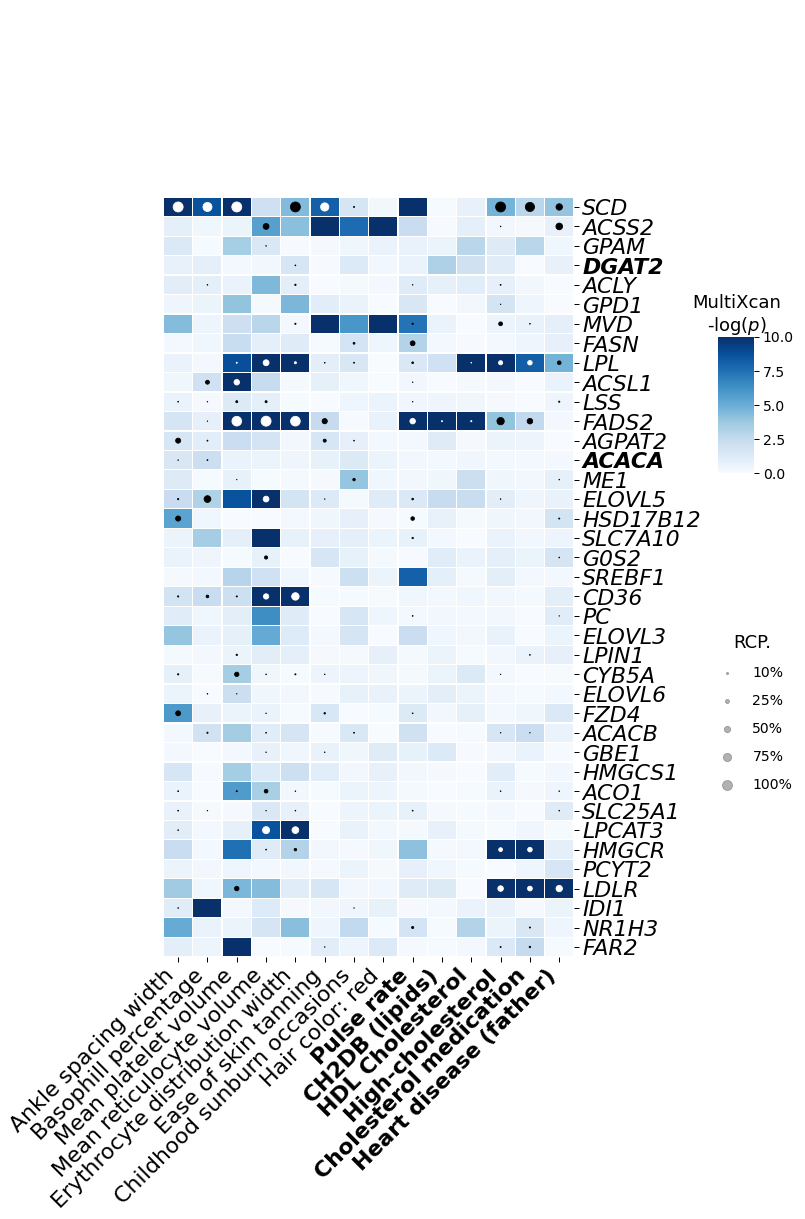

In [83]:
rc = {
    #     "font.size": 9,
    #     "xtick.labelsize": 10,
    #     "ytick.labelsize": 19,
}

with sns.plotting_context("paper", font_scale=2.50, rc=rc):
    g = sns.clustermap(
        data=plot_data,
        vmin=0.0,
        vmax=10.0,
        row_cluster=False,
        col_cluster=False,
        dendrogram_ratio=0.20,
        xticklabels=True,
        yticklabels=True,
        figsize=(10, 19),
        linewidths=0.25,
        cmap="Blues",
        cbar_pos=(0.95, 0.64, 0.05, 0.10),
    )

    g.ax_heatmap.set_xlabel(None)
    g.ax_heatmap.set_ylabel(None)

    g.ax_heatmap.get_xaxis().set_ticklabels(
        g.ax_heatmap.get_xaxis().get_ticklabels(),
        rotation=45,
        horizontalalignment="right",
    )

    for l in g.ax_heatmap.get_yaxis().get_ticklabels():
        l.set_style("italic")
        if l.get_text() in ("DGAT2", "ACACA"):
            l.set_fontweight("bold")

    for l in g.ax_heatmap.get_xaxis().get_ticklabels():
        if l.get_text() in lipids_traits:
            l.set_fontweight("bold")

    g.ax_heatmap.scatter(
        fastenloc_heatmap_data["traits"].tolist(),
        fastenloc_heatmap_data["genes"].tolist(),
        marker=".",
        s=fastenloc_heatmap_data["marker_size"].tolist(),
        color=fastenloc_heatmap_data["color"].tolist(),
    )

    for rcp in [10, 25, 50, 75, 100]:
        plt.scatter(
            [],
            [],
            marker=".",
            c="k",
            alpha=0.3,
            s=np.power(rcp, n_power),
            label=str(rcp) + "%",
        )
    leg = plt.legend(
        scatterpoints=1,
        frameon=False,
        labelspacing=1,
        loc="center right",
        bbox_to_anchor=(1.90, -2.0, 0.5, 0.5),
        title="RCP.",
        title_fontsize=18,  # rc['ytick.labelsize'],
        fontsize=14,  # rc['ytick.labelsize'],
    )
    plt.setp(leg.get_title(), multialignment="center")

    g.ax_cbar.set_title("MultiXcan\n-log($p$)", fontdict={"fontsize": 18})
    g.ax_cbar.tick_params(labelsize=14)

    output_filepath = OUTPUT_FIGURES_DIR / f"lv{LV_NUMBER_SELECTED}-twas_plot.svg"
    display(output_filepath)
    plt.savefig(
        output_filepath,
        #         dpi=600,
        bbox_inches="tight",
        facecolor="white",
    )

# Show p-values for some genes

In [84]:
_tmp = plot_data.loc["DGAT2", lipids_traits].sort_values()
_tmp = np.power(10, -_tmp)
display(_tmp)

trait_description
Cholesterol medication    0.985034
Pulse rate                0.208371
Heart disease (father)    0.179718
High-cholesterol          0.070069
HDL Cholesterol           0.010152
CH2DB (lipids)            0.000561
Name: DGAT2, dtype: float64

In [85]:
_tmp = plot_data.loc["ACACA", lipids_traits].sort_values()
_tmp = np.power(10, -_tmp)
display(_tmp)

trait_description
High-cholesterol          0.621505
Cholesterol medication    0.618065
CH2DB (lipids)            0.593779
Heart disease (father)    0.556676
Pulse rate                0.497213
HDL Cholesterol           0.423932
Name: ACACA, dtype: float64